> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Week 2: A Data Scientist's most fundamental tools

*Thursday, January 25, 2018*

Today's exercises will be related to chapters 3, 4, 5, 6 from DSfS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code. It's a bit much this time, I admit that, but we're laying the foundation for great things and it's important we cover the (many) basics first.

The exercises today cover:
* Essential Python
* Data visualization
* Linear algebra
* Statistics
* Probability theory

This is the last week where we will be doing Python for the sake of learning Python. If you feel that it is very difficult you should read the chapter in the book carefully. Alternatively, you can go through [Codeacademy's Python course](https://www.codecademy.com/learn/learn-python).

**On explaining your code**: Some of you may be new to solving problems using code. At this point you may be wondering what level of detail I expect from your solutions. This is the guideline: Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote our friend Einstein: *"Make everything as simple as possible, but not simpler"*. When you optimize for your own future comprehension, other people will also be able to understand what you did.

**Feedback:** If you find errors or have an opinion, positive or negative, about some of the exercises (or the teaching in general) that you would like to voice you can send me anonymous feedback at http://ulfaslak.com/vent.

## Exercises

### Part 1: Essential Python (DSFS Chapter 2)

>**Ex. 2.1.1**: Why does `5 / 2 == 2` in Python 2.7?

Because it is integer division. This will always round down.

>**Ex. 2.1.2**: What is the point of using `try` and `except`? Write some code that shows how to use these.

This allows your code to customize exception handling.

In [1]:
try:
    x = r
except:
    print "r is not defined"

r is not defined


>**Ex 2.1.3**: Last week you learned about `dict`s, so now you're ready for `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

A default dict is a lot like a regular dict except that it is initialized with a function that takes no arguments and reutrns a default value for a key.So, it will never throw a key exeption  error.

In [2]:
from collections import defaultdict
def create_defaultdict(l):
    dd = defaultdict(lambda: list())
    for item in l:
        dd[item[0]].append(item[1])
    return dd

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]
t = create_defaultdict(l)
print t

defaultdict(<function <lambda> at 0x10c414a28>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})


>**Ex 2.1.4**: Take a list `a = list("justreadtheinstructions")` and
1. count the number of times each element occurs using `Counter`,
2. report the two most common elements

>*Hint: you can import `Counter` from `collections`*

In [3]:
from collections import Counter
def countit(l):
    count = Counter()
    for c in l:
        count[c] += 1
    return count

a = list("justreadtheinstructions")
print countit(a).most_common(2)



[('t', 4), ('s', 3)]


>**Ex 2.1.5**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.

>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list*

In [4]:
b = list("ofcourseistillloveyou") 
a_s = set(a)
b_s = set(b)
intersect = a_s.intersection(b_s)
union = a_s.union(b_s)
print intersect
print union
print (float(len(intersect))/float(len(union)))

set(['c', 'e', 'i', 'o', 's', 'r', 'u', 't'])
set(['a', 'c', 'e', 'd', 'f', 'i', 'h', 'j', 'l', 'o', 'n', 's', 'r', 'u', 't', 'v', 'y'])
0.470588235294


**Note:** If you finish all of today's exercises, either in class or at some point before the next session, I encourage you to read through the rest of Chapter 2 and try coding up some examples with the different functionality that Joel introduces. It will be worth your while.

### Part 2: Visualization (DSFS Chapter 3)

>**Ex. 2.2.1**: Create two lists, `x` and `y`, that each contain 10 numbers of your liking. Using `matplotlib`'s `scatter` function, plot these two lists against each other. Give your figure x and y **axis labels** and a **title**.

>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`* <br>
>***Info***:* From now on, unless otherwise stated, you should always label your axes and title your figure appropriately.*

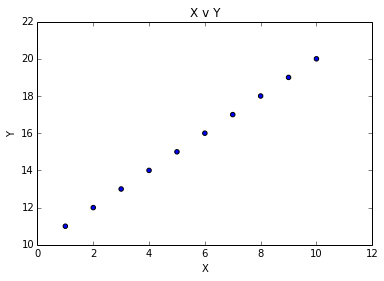

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10]
y = [11,12,13,14,15,16,17,18,19,20]
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X v Y")
plt.show()

> **Ex. 2.2.2**: The below code returns two lists with numbers. Explain what it does using code comments above or at the end of each line.

In [7]:
import requests as rq # imports request library under name rq

# Takes a subreddit path, the total number of posts to be retireve, and the number of posts to retrieve per fetch
# returns lists of the number of comments (x) and the score for a post (y)
def get_x_y(subreddit, N, count=25): 
    # Function inside another function
    # takes a subreddit, the number of posts to retrieve and the id of the last post fethced
    # return the data in json form for the posts specifying those parameters
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after) # url to make request to
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json() # make request to reddit
        print "Retrieved %d posts from page %s" % (count, after)
        return data
    
    after = "" # start at the very beginning of the subreddit

    x, y = [], [] # intialize lists for number of comments and scores
    # make calls to _get_data function in chunks until there are a total of N posts
    for n in range(N/count):
        # Get the data
        data = _get_data(subreddit, count, after)
        # Put all the data from the json into x and y respectively
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        # update after for the next request
        after = data['data']['after']
    # return x and y
    return x, y
# make call to function                          
x, y = get_x_y("gameofthrones", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_7u80ou
Retrieved 25 posts from page t3_7tuy3d
Retrieved 25 posts from page t3_7tmy77
Retrieved 25 posts from page t3_7tficv
Retrieved 25 posts from page t3_7t1m9c
Retrieved 25 posts from page t3_7sw0st
Retrieved 25 posts from page t3_7souy1
Retrieved 25 posts from page t3_7sab7p
Retrieved 25 posts from page t3_7rysa3
Retrieved 25 posts from page t3_7rqxwa
Retrieved 25 posts from page t3_7rn1oz
Retrieved 25 posts from page t3_7rby5j
Retrieved 25 posts from page t3_7r3o4p
Retrieved 25 posts from page t3_7qw5cp
Retrieved 25 posts from page t3_7ql1wx
Retrieved 25 posts from page t3_7q9kiq
Retrieved 25 posts from page t3_7pvp4j
Retrieved 25 posts from page t3_7pox6i
Retrieved 25 posts from page t3_7pg9js


>**Ex. 2.2.3**: The code above gives you number of the number of comments versus score for 500 posts on the "gameofthrones" subreddit. But the `get_x_y` just needs the name of subreddit to run, so we could give it another, like "news".
1. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "gameofthrones" and (right) x and y for "news". Choose different colors for the points in either plot. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
2. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?

In [8]:
x_news, y_news = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_7u1g43
Retrieved 25 posts from page t3_7ucbxf
Retrieved 25 posts from page t3_7u89ty
Retrieved 25 posts from page t3_7u14gq
Retrieved 25 posts from page t3_7u3ujt
Retrieved 25 posts from page t3_7u4usg
Retrieved 25 posts from page t3_7u3onm
Retrieved 25 posts from page t3_7u3ji1
Retrieved 25 posts from page t3_7tz4q5
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_7u1g43
Retrieved 25 posts from page t3_7ucbxf
Retrieved 25 posts from page t3_7u89ty
Retrieved 25 posts from page t3_7u14gq
Retrieved 25 posts from page t3_7u3ujt
Retrieved 25 posts from page t3_7u4usg
Retrieved 25 posts from page t3_7u3onm
Retrieved 25 posts from page t3_7u3ji1
Retrieved 25 posts from page t3_7tz4q5


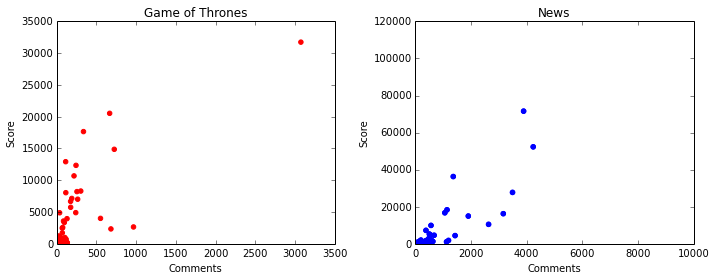

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x, y, color='red')
plt.xlabel("Comments")
plt.ylabel("Score")
plt.title("Game of Thrones")
plt.xlim([0, 3500]) 
plt.ylim([0, 35000])
plt.subplot(1,2,2)
plt.scatter(x_news, y_news, color='blue')
plt.xlabel("Comments")
plt.ylabel("Score")
plt.title("News")
plt.tight_layout()
plt.xlim([0, 10000]) 
plt.ylim([0, 120000])
plt.show()

For game of thrones  there seems to be be less comments per upvote. This may be because the news may have more controversial topics and people want to elaborate more on their points of view. Also the news seems to be a much more popular subreddit based on the number of scores and number of comments.

>**Ex. 2.2.4**: Looking at the scatter plots there appears to be some unevenness in the number of comments and upvotes that different posts receive.
1. Plot the distributions of `x` for "gameofthrones" and "news" as histograms, side by side. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png).
2. What do these distributions say about how people comment on Reddit?

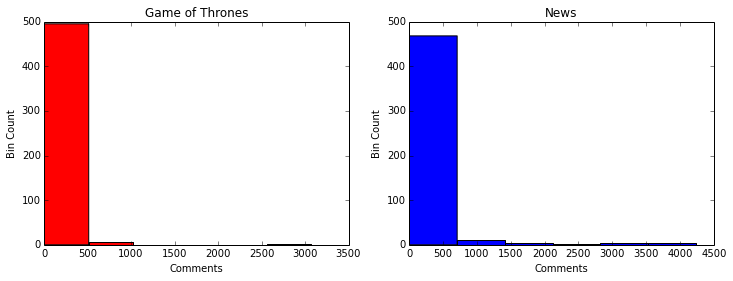

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(x, bins=6, color="red")
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("Game of Thrones")
plt.subplot(1,2,2)
plt.hist(x_news, bins=6, color="blue")
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("News")
plt.show()

People do not typically comment very much on reddit posts. Specifically, the heavy majority of posts have between 0 and 500 comments. Occasionally, there are some major outliers. This may be because there are just so many posts that there aren't enough users to comment on everything.

>**Ex. 2.2.5**: Histograms are great but not perfect for visualizing distributions, so let's try something a little more advanced.
1. Load the `seaborn` package as `sns`. If it isn't installed, you can do so by running `conda install seaborn` in your terminal/console. Take your above code, copy it into the cell below and substitute the `plt.hist` function with `sns.kdeplot`.
2. You plots probably will look a little noisy. This is because the default value of the `bw` parameter in `kdeplot` is quite small (like 0.1 or something). Increase it until your plots start looking nicer, and explain what `bw` is, and why one should adjust it.

> *Hint: If you get an AttributeError, it's because `seaborn` only accepts data as vectorized `numpy` arrays. You can fix this by importing `numpy` as `np`, and running `x = np.array(x)`, somewhere in your code.*

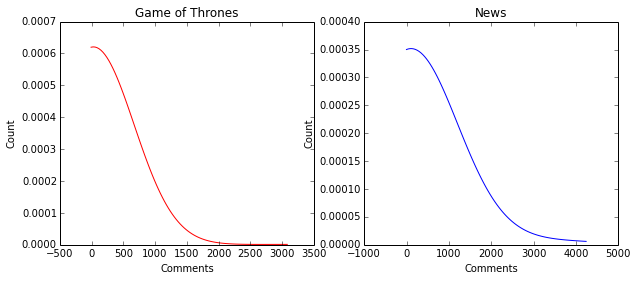

In [38]:
import seaborn as sns
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x,bw=4, color="red")
plt.xlabel("Comments")
plt.ylabel("Count")
plt.title("Game of Thrones")

plt.subplot(1,2,2)
sns.kdeplot(x_news,bw=2, color="blue")
plt.xlabel("Comments")
plt.ylabel("Count")
plt.title("News")
plt.show()

Determines how to scale the bivariate dimensions. It stands for bandwidth. One should adjust it to look so that one can factor out noise and determine the general pattern of the graph.

### Part 3: Linear algebra (DSFS Chapter 4)

>**Ex. 2.3.1**: What does Joel mean when he uses the word *vector*?

He describes it as an object that can be added together or that can be multiplied by scalars to form new vectors. He also says they are points in some finite dimensional space that can store data.

>**Ex. 2.3.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (that's a dot product)?

In [47]:
import numpy as np
a1 = 2*np.array([2, 3])
print a1
a2 = np.array([3, 8]) + np.array([6, 1])
print a2
a3 = np.array([3, 8]) * np.array([6, 1])
print a3
a4 = np.dot(np.array([3, 8]), np.array([6, 1]))
print a4

[4 6]
[9 9]
[18  8]
26


>**Ex. 2.3.3**: Imagine you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

The dot product measures the sum of the product of each dimension. Or, in more mathematical terms, it is the length's of each vector multiplied by the cosine of the angle between them. So, if the dot product is close to 0, the vectors are close to perpendicular. If the dot product is large, the vectors point in the same general direction. Intuitively, the dot product measures the length of the projection of one vector onto another.



>**Ex. 2.3.4**: An $n \times k$ matrix has how many rows and columns? Construct a $5\times5$ *`array`* with `numpy`.

n rows, k columns

In [51]:
r = np.zeros((5,5))
print r

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


>**Ex. 2.3.5**: Create a $5 \times 5$ array `X` (a matrix) with random numbers and $5 \times 1$ array `a` (a tall vector) with 5 random numbers, and compute the matrix-vector multiplication between these two. Use `numpy`'s `dot` method. What happens if you just use `*`?

In [54]:
ran1 = np.random.randn(5,5)
print ran1
print("\n")
ran2 = np.random.randn(5,1)
print ran2

[[-3.80160885e-01  2.42728095e+00  5.91693916e-01 -1.20645933e+00
  -1.21935922e+00]
 [ 9.32021950e-01 -8.74496888e-01  1.19227947e+00  1.10645648e+00
  -3.29917088e-01]
 [ 2.28813386e+00 -1.28969067e-03  1.56739272e-01  1.70971149e-01
  -1.51110358e-01]
 [ 4.05533333e-01 -2.37316576e+00 -8.76667757e-01 -9.30483337e-01
   3.72412586e-01]
 [-2.15143165e-01  1.49333753e-01  9.63683207e-01 -2.39829410e-01
   1.54987467e+00]]


[[0.66008899]
 [1.54495484]
 [0.97777403]
 [0.82927697]
 [0.92309599]]


### Part 4: Statistics (DSFS Chapter 5)

>**Ex. 2.4.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [57]:
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
mean = np.mean(a)
print mean
# Median is defined
median = np.median(a)
print median

1002.3333333333334
3.0


The median is defined as the middle most value in the data.

It may make sense to take the median more seriously because the mean is affected by an outlier data point. The data is skewed.  

>**Ex. 2.4.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How does variance and standard deviation relate? Compute them.
3. What is the interquartile range? Compute it.

Range is defined as the difference between the largest and smallest value.

In [61]:
print max(a)-min(a)

8999


Variance is defined as the squared deviation of a value from the mean. Variance is the square of the standard deviation.

In [64]:
variance = np.var(a)
print variance
std = np.std(a)
print std

7995336.222222224
2827.6025573305424


Interquartile range is the difference between the median of the second half of the data and the first half of the data.

In [68]:
first_med, second_med = np.percentile(x, [25 ,75])
iqr = second_med - first_med
print iqr

18.0


>**Ex. 2.4.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What word do we use for that last point?

Covariance measures how two variables in tandem deviate from their means. Correlation is the covariance divided by both standard deviations.

In [73]:
def correlation(x, y):
    n = len(x)
    cov = np.dot(np.mean(x), np.mean(y)) / (n - 1)
    return cov/np.std(x)/np.std(y)
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]
print correlation(a, b)


0.044769396695071434


In [79]:
b= b[:-1]
a= a[:-1]
print correlation(a, b)

0.26544667796357857


The correlation gets a lot bigger. This is because the outlier in a is removed. It is an outlier.

### Part 5: Probability (DSFS Chapter 6)

>**Ex. 2.5.1**: What does it mean that the probabilities of two different events are dependent? Can you give an example of events whose probabilities of occuring depend on each other (name something that is not in the book)?

The outcome of one of the events will impact the outcome of the other event.

For instance, in the Superbowl, if the Patriots win, Tom Brady will have a better shot of winning Superbowl MVP and if Tom Brady wins Superbowl MVP, there is a greater chance that the Patriots won.

>**Ex. 2.5.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [82]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls * 1.0 / older_girl      # 0.514 ~ 1/2
print "P(both | either): ", both_girls * 1.0 / either_girl   # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

In [96]:
all_3 = 0
just_2 = 0
just_1 = 0
none = 0
oldest_girl = 0
total = 10000
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    middle = random_kid()
    older = random_kid()
    girls = 0
    if younger == "girl": girls += 1
    if middle  == "girl": girls += 1
    if older   == "girl": 
        girls += 1
        oldest_girl += 1
    if girls == 3:
        all_3 += 1
    elif girls == 2:
        just_2 += 1
    elif girls == 1:
        just_1 += 1
    else:
        total -= 1 # decrement total when no girls
        none += 1
print "P(three):", all_3 * 1.0 / 10000      # ~1/8
print "P(two):", just_2 * 1.0 / 10000      # ~3/8
print "P(one):", just_1 * 1.0 / 10000      # ~3/8
print "P(none):", none * 1.0 / 10000      # ~1/8
print "P(all | older):", all_3 * 1.0 / older_girl      # ~ 1/4
print "P(all | one): ", all_3 * 1.0 / total   # ~ (1/8)/(7/8) == 8/56

P(three): 0.1249
P(two): 0.3782
P(one): 0.3771
P(none): 0.1198
P(all | older): 0.250300601202
P(all | one):  0.14189956828


>**Ex. 2.5.3**: Central limit theorem.

>The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are _not_ Gaussian. Let's explore that in the following exercise.
1. Use Python's `random` module to simulate rolling a fair six-sided die `1E7` times. Plot the distribution of dice rolls using a bar-chart. (*Hint: Use `Counter` (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts.*). Describe the shape of the distribution.
2. Now perform a new simulation. Roll a fair six-sided die 10 times and take the *average*. Do that `1E6` times. Plot the distribution of those average values. This time you can't use `Counter` (since the averages are not integer values). Instead use `numpy.histogram` to distribute those numbers into 25 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
3. Then let's use `matplotlib.pyplot.bar` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
4. Describe the shape of _this_ distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.
5. Calculate the mean and standard deviation of the averaged values. Could you have predicted these values by reading DSfS pp. 78-80?

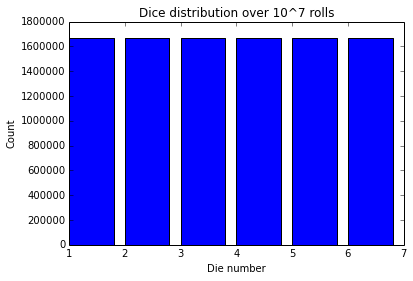

In [113]:
cnt = [0, 0, 0, 0, 0, 0]

for i in range(10**7):
    cnt[random.randint(1, 6)-1] += 1
plt.bar([1,2,3,4,5,6], cnt)
plt.title('Dice distribution over 10^7 rolls')
plt.ylabel('Count')
plt.xlabel('Die number')
plt.show()
    

It seems that each value is equally likely to be rolled

In [125]:
avgs = list()
for _ in range(10**6):
    cnt = [0.,0.,0.,0.,0.,0.]
    for _ in range(10):
        cnt[random.randint(1, 6)-1] += 1
    avgs.append((1*cnt[0] + 2*cnt[1] + 3*cnt[2] + 4*cnt[3] + 5*cnt[4] + 6*cnt[5])/10.)
v, b = np.histogram(avgs, bins=25)

np.histogram returns the bin count and the bin values for a set of data. The cutoffs have a length of 1 more than the values

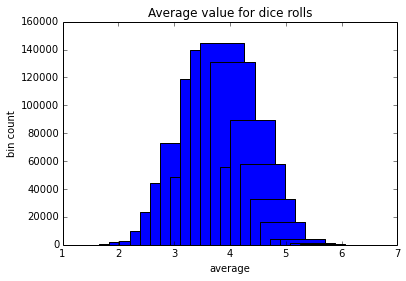

In [131]:
plt.bar(b[:-1], v)
plt.title('Average value for dice rolls')
plt.ylabel('bin count')
plt.xlabel('average')
plt.show()

There is a difference in lengths because the np.histogram returns the bin stop and starts, which will lead to 1 more than total values. To adhere to the, I had the number of bins be one less than that and labeled the x axis with the corresponding tick marks.

The shape is that of a bell curve. It is no longer flat because we are taking the average of 10 samples. Because the mean (1+2+3+4+5+6)/6 = 21/6 = 3.5, the data should be centered around 3.5. When plotting a bunch of averages, the distribution will be Gaussian.